# Tumor Detection Project

This notebook performs tumor classification using a Random Forest classifier based on tumor characteristics.

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline


## Load Data and Initial Exploration
Load the Tumor Detection dataset and inspect basic info.

In [13]:
tumor_data = pd.read_csv('C:\\Tutedude_DS_Course\\Assignments\\Data\\Tumor_Detection.csv')
print(tumor_data.head())
tumor_data.info()
print(tumor_data['diagnosis'].value_counts())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

## Data Cleaning
Drop irrelevant columns and verify missing values.

In [14]:
tumor_data_clean = tumor_data.drop(['id'], axis=1)
print('Missing values per column:')
print(tumor_data_clean.isnull().sum())

Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Exploratory Data Analysis
Visualize diagnosis label distribution and feature correlations.

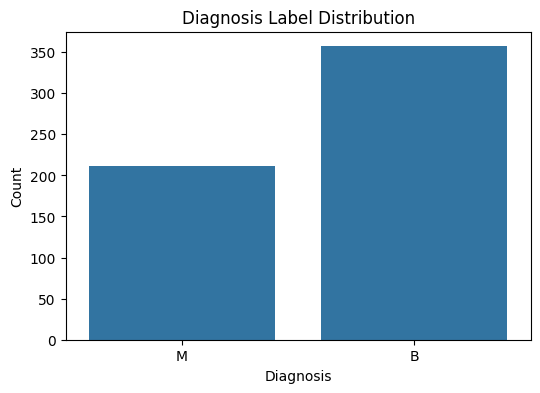

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=tumor_data_clean)
plt.title('Diagnosis Label Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

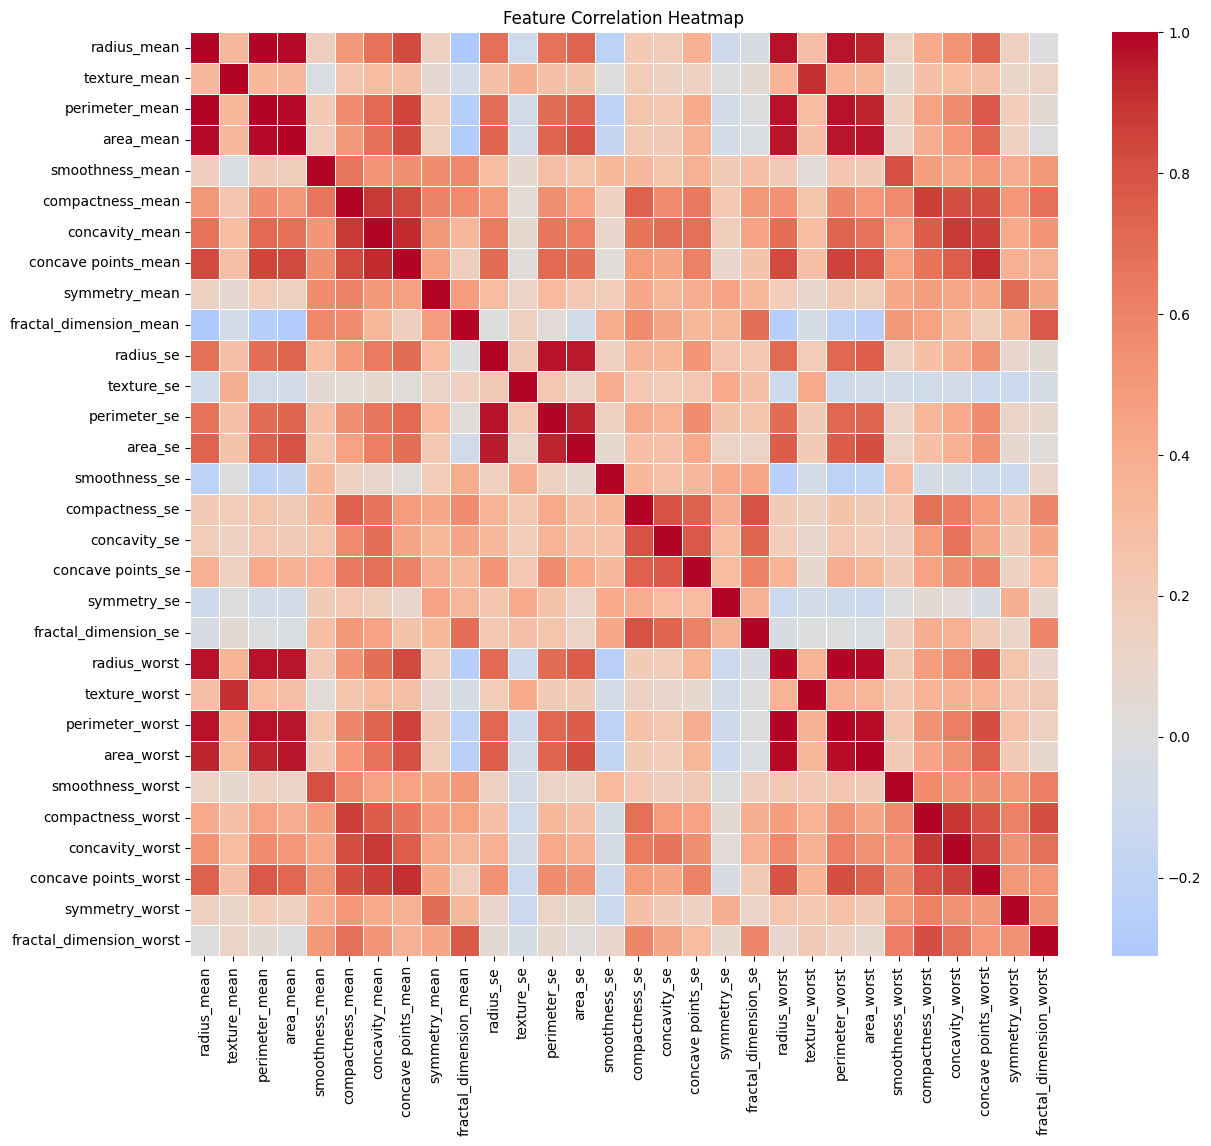

In [16]:
corr = tumor_data_clean.drop('diagnosis', axis=1).corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Data Preprocessing and Feature Engineering
Scale features and encode target labels.

In [17]:
X = tumor_data_clean.drop('diagnosis', axis=1)
y = tumor_data_clean['diagnosis'].map({'B': 0, 'M': 1})
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Features scaled successfully')

Features scaled successfully


## Train/Test Split
Split data into training and testing sets.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

Training samples: 455, Testing samples: 114


## Model Training
Train Random Forest Classifier on training data.

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print('Model training complete')

Model training complete


## Model Evaluation
Evaluate model on test data and present accuracy, classification report, and confusion matrix.

In [20]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
[[70  1]
 [ 3 40]]
